# Attempting Layered Neurons

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
inputs = [[1.0,2.0,3.0,2.5],
          [2.0,5.0,-1.0,2.0],
          [-1.5,2.7,3.3,-0.8]]
weights = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91,.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]

weights2 = [[0.1,-0.14,0.5],
            [-0.5,0.12,-0.33],
            [-0.44,0.73,-0.13]]

biases2 = [-1,2,-0.5]

layer1_output = np.dot(inputs,np.array(weights).T) + biases
layer2_output = np.dot(layer1_output,np.array(weights2).T) + biases2

print(layer2_output)


[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


This netowrk can be visualized as 1 input layer with 4 neurons, a hidden layer as with 3 neurons, and then an output layer with 3 neurons.

# Training Data

In [3]:
!pip install nnfs

# This is to create data easily to test with

In [4]:
import nnfs
nnfs.init()

# Does 3 things:
# Set random set to 0
# creates float32 dtype default
# overrides dot product from numpy
# This is to create repeatable results

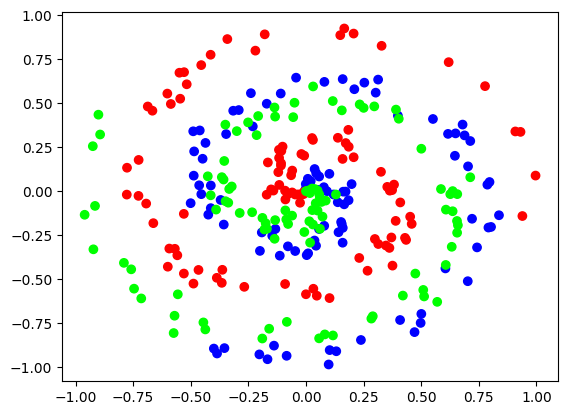

In [13]:
from nnfs.datasets import spiral_data

X,y = spiral_data(samples=100, classes=3)

plt.scatter(X[:,0], X[:,1], c=y, cmap='brg')
plt.show()

# Dense Layer Class

Dense means fully-connected

In [14]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = .01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

# Weights are initialized with inputs then neurons so then
# we don't have to transpose everytime we work with it (foward pass)

# randn gives us Gaussian distribution and multiplying it by .01 makes
# the weights smaller so then it'll be easier for the model to find the
# local minimum to take less time to fit (Need non 0 values for weights
# since it's mulitplied by input)

# Bias can be 0 since it's just added to weight * input


    def forward(self, inputs):
        # def forward pass
        self.output = np.dot(inputs, self.weights) + self.biases

In [21]:
# Use dataset created above

# 2 inputs, 3 outputs
dense1 = Layer_Dense(2,3)

# Forward pass of training data through layer
dense1.forward(X)

# Prints out first 5 rows of data
print(dense1.output[:5])

[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-1.3089768e-04  2.2222730e-04  2.4718292e-05]
 [-1.3260095e-04  4.5155644e-04 -1.9856172e-05]
 [-1.9399147e-04  6.7478878e-04 -3.1859403e-05]
 [-4.5223063e-04  9.3548227e-04  5.2143190e-05]]
